## CV SIFT Method for Image classification

#### Importing necessary libraries

In [28]:
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, hinge_loss
from matplotlib import pyplot as plt

#### Importing the dataset

In [29]:
from keras.datasets import cifar10
(train_data, train_labels), (test_data, test_labels) = cifar10.load_data()

#### Observe Dataset

In [30]:
# Define the class labels
class_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
train_labels_reshaped = train_labels.reshape(-1, )

In [31]:
def showImage(x, y, index):
    plt.figure(figsize=(30,4))
    plt.imshow(x[index])
    plt.xlabel(class_labels[y[index]])

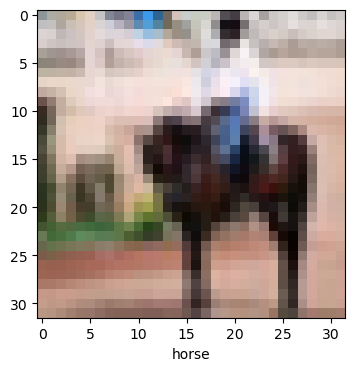

In [32]:
showImage(train_data, train_labels_reshaped, 11)

#### Define the number of clusters for K-Means

In [33]:
num_clusters = 128

#### Initialize the SIFT detector and descriptor

In [34]:
sift = cv2.SIFT_create()

#### Function to extract SIFT features from an image

In [35]:
def extract_sift_features(image):
    kp, des = sift.detectAndCompute(image, None)
    return des

#### Function to build the visual vocabulary

In [36]:
def build_visual_vocabulary(data):
    all_descriptors = []
    for image in data:
        descriptors = extract_sift_features(image)
        if descriptors is not None:
            all_descriptors.extend(descriptors)
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(np.array(all_descriptors))

    # Get the cluster centers (visual words)
    visual_words = kmeans.cluster_centers_

    return kmeans, visual_words

#### Function to compute the bag-of-visual-words representation

In [37]:
def compute_bovw(image, vocab):
    descriptors = extract_sift_features(image)
    if descriptors is None:
        return np.zeros(num_clusters)
    codes = vocab.predict(descriptors)
    histogram, _ = np.histogram(codes, bins=range(num_clusters + 1), density=True)
    return histogram

#### Build the visual vocabulary

In [38]:
# Build the visual vocabulary
vocab, visual_words = build_visual_vocabulary(train_data)

#### Compute the bag-of-visual-words representations for training and test data

In [39]:
train_bovw = np.array([compute_bovw(image, vocab) for image in train_data])
test_bovw = np.array([compute_bovw(image, vocab) for image in test_data])

#### Split the training data into train and validation sets

In [40]:
X_train, X_val, y_train, y_val = train_test_split(train_bovw, train_labels, test_size=0.2, random_state=42)

#### Train the SVM classifier

In [41]:
clf = SVC(kernel='linear', C=1.0, random_state=42)
clf.fit(X_train, y_train)

/Users/abhishekbagde/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(kernel='linear', random_state=42)

#### Evaluate the classifier on the validation set

In [42]:
y_pred = clf.predict(X_val)
val_accuracy = accuracy_score(y_val, y_pred)
print(f"Validation accuracy: {val_accuracy:.4f}")

Validation accuracy: 0.2613


#### Evaluate the classifier on the test set

In [43]:
y_pred = clf.predict(test_bovw)
test_accuracy = accuracy_score(test_labels, y_pred)
print(f"Test accuracy: {test_accuracy:.4f},  Number of Visual Words: {len(visual_words)}")

Test accuracy: 0.2655,  Number of Visual Words: 128


#### Find the loss

In [44]:
# Calculate the validation loss
val_loss = hinge_loss(y_val, clf.decision_function(X_val))
print(f"Validation loss: {val_loss:.4f}")

Validation loss: 3.6396


In [56]:
# Initialize an empty list to store the test accuracies
test_accuracies = []
visual_words_list = []
validation_loss_list = []
kernel_list = ['linear', 'rbf']
num_clusters = 128
C = [0.1, 1.0, 5.0, 10.0, 100.0]
# Number of runs
num_runs = 1
random_state = 42

# Run the experiment multiple times
for run in range(num_runs):
    for kernal in kernel_list:
            for c in C:
                run = run + 1
                # Build the visual vocabulary
                vocab, visual_words = build_visual_vocabulary(train_data)
                
                visual_words_list_linear.append(visual_words)
            
                # Compute the BoVW representations
                train_bovw = np.array([compute_bovw(image, vocab) for image in train_data])
                test_bovw = np.array([compute_bovw(image, vocab) for image in test_data])
                
                # Train the SVM classifier
                clf = SVC(kernel=kernal, C=c, random_state=random_state)
                clf.fit(train_bovw, train_labels)
        
                # Evaluate the classifier on the test set
                y_pred = clf.predict(test_bovw)
                test_accuracy = accuracy_score(test_labels, y_pred)
            
                # Append the test accuracy to the list
                test_accuracies.append(test_accuracy)
            
                # Calculate the validation loss
                val_loss = hinge_loss(y_val, clf.decision_function(X_val))
            
                validation_loss_list.append(val_loss)
                
                print(f"Run {run}:   kernal: {kernal}, Number of Visual Words: {len(visual_words)} , Test accuracy: {test_accuracy:.4f}, Validation loss: {val_loss:.4f}, C: {c}, Random Sate: {random_state}")

# Convert the list to a NumPy array
test_accuracies_linear = np.array(test_accuracies_linear)

/Users/abhishekbagde/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run 1:   kernal: linear, Number of Visual Words: 128 , Test accuracy: 0.2544, Validation loss: 3.7037, C: 0.1, Random Sate: 42


/Users/abhishekbagde/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run 2:   kernal: linear, Number of Visual Words: 128 , Test accuracy: 0.2657, Validation loss: 3.5328, C: 1.0, Random Sate: 42


/Users/abhishekbagde/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run 3:   kernal: linear, Number of Visual Words: 128 , Test accuracy: 0.2672, Validation loss: 3.5030, C: 5.0, Random Sate: 42


/Users/abhishekbagde/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run 4:   kernal: linear, Number of Visual Words: 128 , Test accuracy: 0.2609, Validation loss: 3.4846, C: 10.0, Random Sate: 42


/Users/abhishekbagde/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run 5:   kernal: linear, Number of Visual Words: 128 , Test accuracy: 0.2626, Validation loss: 3.5382, C: 100.0, Random Sate: 42


/Users/abhishekbagde/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run 6:   kernal: rbf, Number of Visual Words: 128 , Test accuracy: 0.2772, Validation loss: 3.2783, C: 0.1, Random Sate: 42


/Users/abhishekbagde/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run 7:   kernal: rbf, Number of Visual Words: 128 , Test accuracy: 0.2908, Validation loss: 2.1612, C: 1.0, Random Sate: 42


/Users/abhishekbagde/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run 8:   kernal: rbf, Number of Visual Words: 128 , Test accuracy: 0.2635, Validation loss: 0.6969, C: 5.0, Random Sate: 42


/Users/abhishekbagde/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run 9:   kernal: rbf, Number of Visual Words: 128 , Test accuracy: 0.2495, Validation loss: 0.2986, C: 10.0, Random Sate: 42


/Users/abhishekbagde/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Run 10:   kernal: rbf, Number of Visual Words: 128 , Test accuracy: 0.2431, Validation loss: 0.5118, C: 100.0, Random Sate: 42


In [57]:
for i in test_accuracies:
    print(i)

0.2544
0.2657
0.2672
0.2609
0.2626
0.2772
0.2908
0.2635
0.2495
0.2431


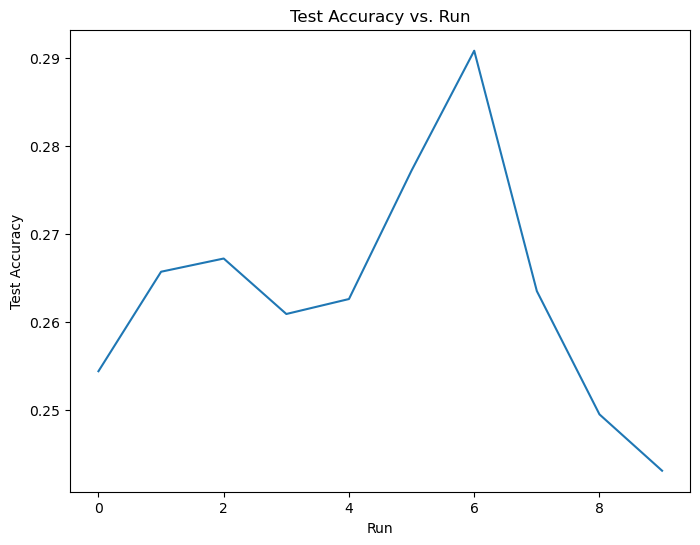

In [58]:
# Plot the test accuracies
plt.figure(figsize=(8, 6))
plt.plot(range(len(test_accuracies)), test_accuracies)
plt.xlabel('Run')
plt.ylabel('Test Accuracy')
plt.title('Test Accuracy vs. Run')
plt.show()

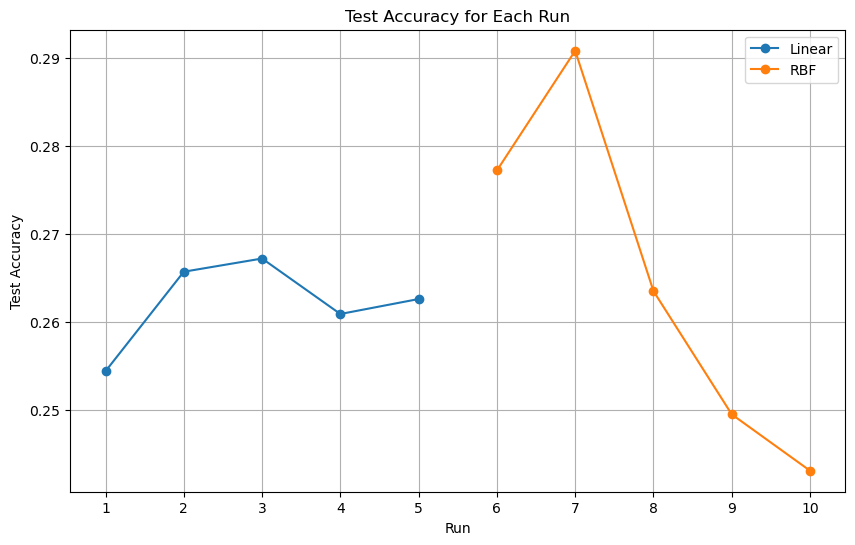

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for each run
data = [
    {"Run": 1, "Kernel": "Linear", "Test Accuracy": 0.2544},
    {"Run": 2, "Kernel": "Linear", "Test Accuracy": 0.2657},
    {"Run": 3, "Kernel": "Linear", "Test Accuracy": 0.2672},
    {"Run": 4, "Kernel": "Linear", "Test Accuracy": 0.2609},
    {"Run": 5, "Kernel": "Linear", "Test Accuracy": 0.2626},
    {"Run": 6, "Kernel": "RBF", "Test Accuracy": 0.2772},
    {"Run": 7, "Kernel": "RBF", "Test Accuracy": 0.2908},
    {"Run": 8, "Kernel": "RBF", "Test Accuracy": 0.2635},
    {"Run": 9, "Kernel": "RBF", "Test Accuracy": 0.2495},
    {"Run": 10, "Kernel": "RBF", "Test Accuracy": 0.2431},
]

# Convert data to pandas DataFrame
df = pd.DataFrame(data)

# Plot the graph
plt.figure(figsize=(10, 6))
for kernel, group in df.groupby("Kernel"):
    plt.plot(group["Run"], group["Test Accuracy"], marker='o', label=kernel)
plt.xlabel("Run")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy for Each Run")
plt.xticks(df["Run"])
plt.legend()
plt.grid(True)
plt.show()

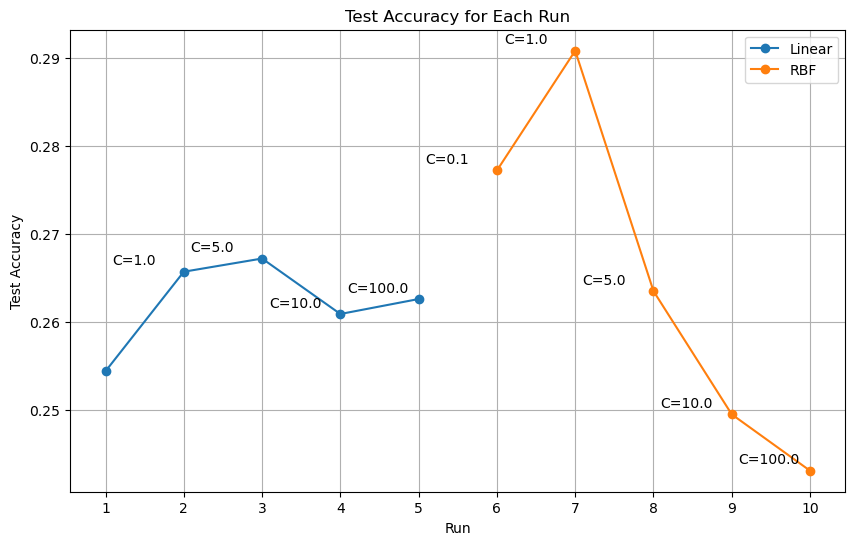

In [68]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for each run
data = [
    {"Run": 1, "Kernel": "Linear", "Test Accuracy": 0.2544, "C": 0.1},
    {"Run": 2, "Kernel": "Linear", "Test Accuracy": 0.2657, "C": 1.0},
    {"Run": 3, "Kernel": "Linear", "Test Accuracy": 0.2672, "C": 5.0},
    {"Run": 4, "Kernel": "Linear", "Test Accuracy": 0.2609, "C": 10.0},
    {"Run": 5, "Kernel": "Linear", "Test Accuracy": 0.2626, "C": 100.0},
    {"Run": 6, "Kernel": "RBF", "Test Accuracy": 0.2772, "C": 0.1},
    {"Run": 7, "Kernel": "RBF", "Test Accuracy": 0.2908, "C": 1.0},
    {"Run": 8, "Kernel": "RBF", "Test Accuracy": 0.2635, "C": 5.0},
    {"Run": 9, "Kernel": "RBF", "Test Accuracy": 0.2495, "C": 10.0},
    {"Run": 10, "Kernel": "RBF", "Test Accuracy": 0.2431, "C": 100.0},
]

# Convert data to pandas DataFrame
df = pd.DataFrame(data)

# Plot the graph
plt.figure(figsize=(10, 6))
for kernel, group in df.groupby("Kernel"):
    plt.plot(group["Run"], group["Test Accuracy"], marker='o', label=kernel)
    for i, (run, row) in enumerate(group.iterrows(), start=1):
        plt.annotate(f"C={row['C']}", xy=(run, row["Test Accuracy"]), xytext=(5, 5), textcoords='offset points')

plt.xlabel("Run")
plt.ylabel("Test Accuracy")
plt.title("Test Accuracy for Each Run")
plt.xticks(df["Run"])
plt.legend()
plt.grid(True)
plt.show()

#### Check the result

Predicted Result: deer
Actual Result:


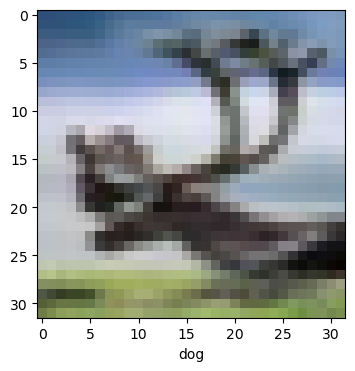

In [69]:
# Insert the image number
image_idx = 40

test_labels_reshaped = test_labels.reshape(-1, )
# Get the predicted result
predicted_class = y_pred[image_idx]
print(f"Predicted Result: {class_labels[predicted_class]}")

# Display the actual image
print("Actual Result:")
showImage(test_data, train_labels_reshaped, image_idx)

#### Evaluate Model

In [70]:
print("test_data shape:", test_data.shape)
print("test_labels shape:", test_labels_reshaped.shape)

test_data shape: (10000, 32, 32, 3)
test_labels shape: (10000,)


In [71]:
from keras.utils import to_categorical
y_test_one_hot = to_categorical(test_labels_reshaped, num_classes=10)

In [72]:
from sklearn.metrics import classification_report

In [73]:
# Get the classification report for the test set
report = classification_report(test_labels, y_pred, target_names=class_labels)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

    airplane       0.32      0.38      0.35      1000
  automobile       0.28      0.33      0.31      1000
        bird       0.17      0.19      0.18      1000
         cat       0.18      0.17      0.18      1000
        deer       0.15      0.15      0.15      1000
         dog       0.23      0.22      0.22      1000
        frog       0.21      0.18      0.19      1000
       horse       0.28      0.22      0.25      1000
        ship       0.30      0.30      0.30      1000
       truck       0.30      0.29      0.29      1000

    accuracy                           0.24     10000
   macro avg       0.24      0.24      0.24     10000
weighted avg       0.24      0.24      0.24     10000



In [74]:
# Get the confusion matrix for the test set
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, y_pred)
#print("Confusion Matrix:\n", cm)
cm

array([[378,  54, 140,  50,  82,  29,  35,  50, 143,  39],
       [ 56, 329,  69,  84,  52,  69,  93,  42,  81, 125],
       [172,  72, 190,  92, 113,  68,  68,  52, 113,  60],
       [ 68, 101,  89, 175, 117, 147,  88,  79,  54,  82],
       [ 90,  77, 138,  92, 152,  91, 110,  99,  79,  72],
       [ 53,  77,  99, 155, 108, 217,  89,  89,  55,  58],
       [ 67, 119, 124,  89, 123, 114, 178,  54,  50,  82],
       [ 75,  67,  90, 108, 121,  97,  73, 223,  41, 105],
       [163, 105, 100,  70,  79,  40,  51,  34, 301,  57],
       [ 42, 155,  56,  79,  64,  70,  80,  80,  86, 288]])

In [75]:
import seaborn as sns

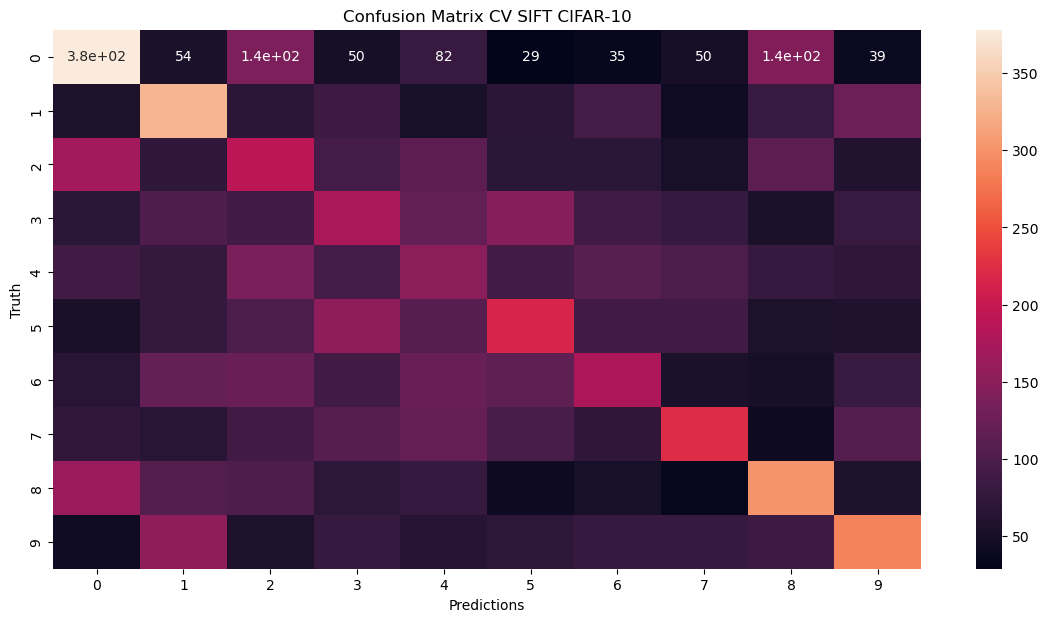

In [76]:
plt.figure(figsize=(14,7))
sns.heatmap(cm, annot=True, cbar=True)  # Adjust the colormap as needed
plt.ylabel("Truth")
plt.xlabel("Predictions")
plt.title("Confusion Matrix CV SIFT CIFAR-10")
plt.show()
